In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
try:
    reload(galpy.df_src.streampepperdf)
    reload(galpy.df_src.streampepperdf.galpy.df_src.streamgapdf)
    reload(galpy.df_src.streampepperdf.galpy.df_src.streamdf)
except NameError:
    import galpy.df_src.streampepperdf
import time
import numpy
from scipy import signal, ndimage
import statsmodels.api as sm
from galpy.potential import LogarithmicHaloPotential
from galpy.orbit import Orbit
from galpy.actionAngle import actionAngleIsochroneApprox
from galpy.util import bovy_conversion, bovy_coords
from galpy.util import bovy_plot
%pylab inline
import seaborn as sns
R0, V0= 8., 220.

Populating the interactive namespace from numpy and matplotlib


# Tests of the streampepperdf code

To test the code, we set up ``streampepperdf`` instances for up to 4 impacts:

In [3]:
lp= LogarithmicHaloPotential(normalize=1.,q=0.9)
xv_prog_init= numpy.array([30.,0.,0.,0., 105.74895, 105.74895])
def convert_to_cylindrical(xv):
    R,phi,Z= bovy_coords.rect_to_cyl(xv[:,0],xv[:,1],xv[:,2])
    vR,vT,vZ= bovy_coords.rect_to_cyl_vec(xv[:,3],xv[:,4],xv[:,5],R,phi,Z,cyl=True)
    out= numpy.empty_like(xv)
    # Preferred galpy arrangement of cylindrical coordinates
    out[:,0]= R
    out[:,1]= vR
    out[:,2]= vT
    out[:,3]= Z
    out[:,4]= vZ
    out[:,5]= phi
    return out
sigv= 0.365*(10./2.)**(1./3.)
RvR_prog_init= convert_to_cylindrical(xv_prog_init[:,numpy.newaxis].T)[0,:]
prog_init= Orbit([RvR_prog_init[0]/R0,RvR_prog_init[1]/V0,RvR_prog_init[2]/V0,
                  RvR_prog_init[3]/R0,RvR_prog_init[4]/V0,RvR_prog_init[5]])
times= numpy.linspace(0.,10.88/bovy_conversion.time_in_Gyr(V0,R0),10001)
prog_init.integrate(times,lp)
xv_unp_peri_prog= [prog_init.x(times[-1])[0],prog_init.y(times[-1])[0],prog_init.z(times[-1]),
              prog_init.vx(times[-1])[0],prog_init.vy(times[-1])[0],prog_init.vz(times[-1])]
RvR_unp_peri_prog= convert_to_cylindrical(numpy.array(xv_unp_peri_prog)[:,numpy.newaxis].T)[0,:]
prog_unp_peri= Orbit([RvR_unp_peri_prog[0],RvR_unp_peri_prog[1],RvR_unp_peri_prog[2],
                      RvR_unp_peri_prog[3]+0.0,RvR_unp_peri_prog[4],RvR_unp_peri_prog[5]])
aAI= actionAngleIsochroneApprox(pot=lp,b=0.8)

In [4]:
sdf_pepper_1impacts= galpy.df_src.streampepperdf.streampepperdf(\
    sigv/V0,progenitor=prog_unp_peri,pot=lp,aA=aAI,
    leading=False,nTrackChunks=26,nTrackIterations=1,
    sigMeanOffset=4.5,
    tdisrupt=10.88/bovy_conversion.time_in_Gyr(V0,R0),
    Vnorm=V0,Rnorm=R0,
    impactb=[0.1/R0],
    subhalovel=numpy.array([[36.82200571,102.7700529,169.4174464]])/V0,
    timpact=[2.88/bovy_conversion.time_in_Gyr(V0,R0)],
    impact_angle=[-1.34],
    GM=[10.**-2.2/bovy_conversion.mass_in_1010msol(V0,R0)],
    rs=[0.55/R0],
    spline_order=1) 

In [5]:
sdf_pepper_2impacts= galpy.df_src.streampepperdf.streampepperdf(\
    sigv/V0,progenitor=prog_unp_peri,pot=lp,aA=aAI,
    leading=False,nTrackChunks=26,nTrackIterations=1,
    sigMeanOffset=4.5,
    tdisrupt=10.88/bovy_conversion.time_in_Gyr(V0,R0),
    Vnorm=V0,Rnorm=R0,
    impactb=[0.1/R0,0./R0],
    subhalovel=numpy.array([[36.82200571,102.7700529,169.4174464],
                            [6.82200571,132.7700529,149.4174464]])/V0,
    timpact=[2.88/bovy_conversion.time_in_Gyr(V0,R0),1.88/bovy_conversion.time_in_Gyr(V0,R0)],
    impact_angle=[-1.34,-0.34,-2.,-0.8],
    GM=[10.**-2.2/bovy_conversion.mass_in_1010msol(V0,R0),10.**-2./bovy_conversion.mass_in_1010msol(V0,R0)],
    rs=[0.55/R0,0.625/R0],
    spline_order=1) 

In [6]:
sdf_pepper_3impacts= galpy.df_src.streampepperdf.streampepperdf(\
    sigv/V0,progenitor=prog_unp_peri,pot=lp,aA=aAI,
    leading=False,nTrackChunks=26,nTrackIterations=1,
    sigMeanOffset=4.5,
    tdisrupt=10.88/bovy_conversion.time_in_Gyr(V0,R0),
    Vnorm=V0,Rnorm=R0,
    impactb=[0.1/R0,0./R0,0.3/R0],
    subhalovel=numpy.array([[36.82200571,102.7700529,169.4174464],
                            [6.82200571,132.7700529,149.4174464],
                            [126.82200571,32.7700529,89.4174464]])/V0,
    timpact=[2.88/bovy_conversion.time_in_Gyr(V0,R0),1.88/bovy_conversion.time_in_Gyr(V0,R0),
             2.38/bovy_conversion.time_in_Gyr(V0,R0)],
    impact_angle=[-1.34,-0.34,-2.],
    GM=[10.**-2.2/bovy_conversion.mass_in_1010msol(V0,R0),10.**-2./bovy_conversion.mass_in_1010msol(V0,R0),
        10.**-1.9/bovy_conversion.mass_in_1010msol(V0,R0)],
    rs=[0.55/R0,0.625/R0,0.675/R0],
    spline_order=1) 

In [7]:
sdf_pepper_4impacts= galpy.df_src.streampepperdf.streampepperdf(\
    sigv/V0,progenitor=prog_unp_peri,pot=lp,aA=aAI,
    leading=False,nTrackChunks=26,nTrackIterations=1,
    sigMeanOffset=4.5,
    tdisrupt=10.88/bovy_conversion.time_in_Gyr(V0,R0),
    Vnorm=V0,Rnorm=R0,
    impactb=[0.1/R0,0./R0,0.3/R0,0.2/R0],
    subhalovel=numpy.array([[36.82200571,102.7700529,169.4174464],
                            [6.82200571,132.7700529,149.4174464],
                            [126.82200571,32.7700529,89.4174464],
                            [-36.82200571,22.7700529,-149.4174464]])/V0,
    timpact=[2.88/bovy_conversion.time_in_Gyr(V0,R0),1.88/bovy_conversion.time_in_Gyr(V0,R0),
             2.38/bovy_conversion.time_in_Gyr(V0,R0),3.38/bovy_conversion.time_in_Gyr(V0,R0)],
    impact_angle=[-1.34,-0.34,-2.,-0.8],
    GM=[10.**-2.2/bovy_conversion.mass_in_1010msol(V0,R0),10.**-2./bovy_conversion.mass_in_1010msol(V0,R0),
        10.**-1.9/bovy_conversion.mass_in_1010msol(V0,R0),10.**-2.1/bovy_conversion.mass_in_1010msol(V0,R0)],
    rs=[0.55/R0,0.625/R0,0.675/R0,0.6/R0],
    spline_order=1) 

## Tests of the minimum $\Omega_\parallel$

For the case of 1 impact:

/Users/bovy/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:1057: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if aspect == 'normal':

/Users/bovy/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:1062: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif aspect in ('equal', 'auto'):



/Users/bovy/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):



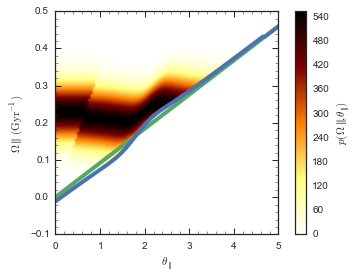

In [8]:
Opars= numpy.linspace(-0.1,0.5,101)/bovy_conversion.freq_in_Gyr(V0,R0)
apars= numpy.linspace(0.,5.,101)
lowlim= numpy.array([sdf_pepper_1impacts.minOpar(da) for da in apars])
y= numpy.array([sdf_pepper_1impacts.pOparapar(Opars,a) for a in apars])
bovy_plot.bovy_dens2d(y.T,
                      origin='lower',
                      cmap='afmhot_r',colorbar=True,
                      vmin=0.,
                      xrange=[apars[0],apars[-1]],
                      yrange=[Opars[0]*bovy_conversion.freq_in_Gyr(V0,R0),
                              Opars[-1]*bovy_conversion.freq_in_Gyr(V0,R0)],
                     zlabel=r'$p(\Omega\parallel,\theta_\parallel)$')
plot(apars,lowlim*bovy_conversion.freq_in_Gyr(V0,R0),lw=4.,zorder=2)
plot(apars,apars/sdf_pepper_1impacts._tdisrupt*bovy_conversion.freq_in_Gyr(V0,R0),lw=4.,zorder=1)
xlabel(r'$\theta_\parallel$')
ylabel(r'$\Omega\parallel\,(\mathrm{Gyr}^{-1})$')

For the case of 2 impacts:

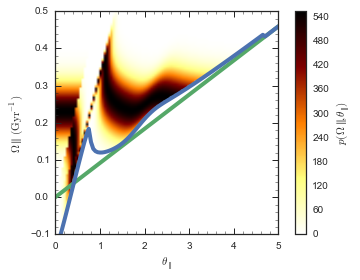

In [9]:
Opars= numpy.linspace(-0.1,0.5,101)/bovy_conversion.freq_in_Gyr(V0,R0)
apars= numpy.linspace(0.,5.,101)
lowlim= numpy.array([sdf_pepper_2impacts.minOpar(da) for da in apars])
y= numpy.array([sdf_pepper_2impacts.pOparapar(Opars,a) for a in apars])
bovy_plot.bovy_dens2d(y.T,
                      origin='lower',
                      cmap='afmhot_r',colorbar=True,
                      vmin=0.,
                      xrange=[apars[0],apars[-1]],
                      yrange=[Opars[0]*bovy_conversion.freq_in_Gyr(V0,R0),
                              Opars[-1]*bovy_conversion.freq_in_Gyr(V0,R0)],
                     zlabel=r'$p(\Omega\parallel,\theta_\parallel)$')
plot(apars,lowlim*bovy_conversion.freq_in_Gyr(V0,R0),lw=4.,zorder=2)
plot(apars,apars/sdf_pepper_2impacts._tdisrupt*bovy_conversion.freq_in_Gyr(V0,R0),lw=4.,zorder=1)
xlabel(r'$\theta_\parallel$')
ylabel(r'$\Omega\parallel\,(\mathrm{Gyr}^{-1})$')

For the case of 3 impacts:

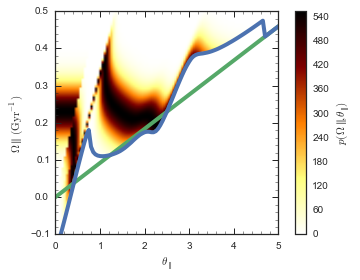

In [10]:
Opars= numpy.linspace(-0.1,0.5,101)/bovy_conversion.freq_in_Gyr(V0,R0)
apars= numpy.linspace(0.,5.,101)
lowlim= numpy.array([sdf_pepper_3impacts.minOpar(da) for da in apars])
y= numpy.array([sdf_pepper_3impacts.pOparapar(Opars,a) for a in apars])
bovy_plot.bovy_dens2d(y.T,
                      origin='lower',
                      cmap='afmhot_r',colorbar=True,
                      vmin=0.,
                      xrange=[apars[0],apars[-1]],
                      yrange=[Opars[0]*bovy_conversion.freq_in_Gyr(V0,R0),
                              Opars[-1]*bovy_conversion.freq_in_Gyr(V0,R0)],
                     zlabel=r'$p(\Omega\parallel,\theta_\parallel)$')
plot(apars,lowlim*bovy_conversion.freq_in_Gyr(V0,R0),lw=4.,zorder=2)
plot(apars,apars/sdf_pepper_3impacts._tdisrupt*bovy_conversion.freq_in_Gyr(V0,R0),lw=4.,zorder=1)
xlabel(r'$\theta_\parallel$')
ylabel(r'$\Omega\parallel\,(\mathrm{Gyr}^{-1})$')

For the case of 4 impacts:

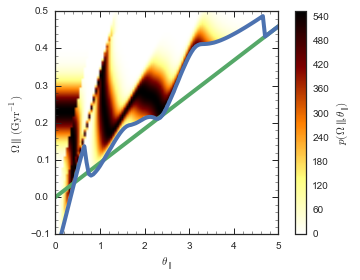

In [11]:
Opars= numpy.linspace(-0.1,0.5,101)/bovy_conversion.freq_in_Gyr(V0,R0)
apars= numpy.linspace(0.,5.,101)
lowlim= numpy.array([sdf_pepper_4impacts.minOpar(da) for da in apars])
y= numpy.array([sdf_pepper_4impacts.pOparapar(Opars,a) for a in apars])
bovy_plot.bovy_dens2d(y.T,
                      origin='lower',
                      cmap='afmhot_r',colorbar=True,
                      vmin=0.,
                      xrange=[apars[0],apars[-1]],
                      yrange=[Opars[0]*bovy_conversion.freq_in_Gyr(V0,R0),
                              Opars[-1]*bovy_conversion.freq_in_Gyr(V0,R0)],
                     zlabel=r'$p(\Omega\parallel,\theta_\parallel)$')
plot(apars,lowlim*bovy_conversion.freq_in_Gyr(V0,R0),lw=4.,zorder=2)
plot(apars,apars/sdf_pepper_4impacts._tdisrupt*bovy_conversion.freq_in_Gyr(V0,R0),lw=4.,zorder=1)
xlabel(r'$\theta_\parallel$')
ylabel(r'$\Omega\parallel\,(\mathrm{Gyr}^{-1})$')

## Tests of the density

For 1 impact:

In [12]:
xs= numpy.linspace(0.,4.5,101)
# Compute
dens_unp= numpy.array([super(galpy.df_src.streampepperdf.streampepperdf,sdf_pepper_4impacts)._density_par(x) for x in xs])
dens_approx_1impacts= numpy.array([sdf_pepper_1impacts.density_par(x,approx=True) for x in xs])
dens_1impacts= numpy.array([sdf_pepper_1impacts.density_par(x,approx=False) for x in xs])

/Users/bovy/anaconda/lib/python2.7/site-packages/scipy/integrate/quadpack.py:352: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)



(-0.05, 0.05)

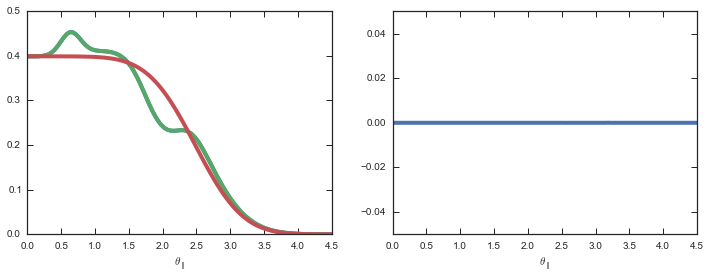

In [13]:
figsize(12,4)
subplot(1,2,1)
plot(xs,dens_1impacts/numpy.sum(dens_1impacts)/(xs[1]-xs[0]),lw=4.)
plot(xs,dens_approx_1impacts/numpy.sum(dens_approx_1impacts)/(xs[1]-xs[0]),lw=4.)
plot(xs,dens_unp/numpy.sum(dens_unp)/(xs[1]-xs[0]),lw=4.)
#dum= hist(apar,bins=101,normed=True,histtype='step',color='k',zorder=0,lw=5.)
xlabel(r'$\theta_\parallel$')
subplot(1,2,2)
plot(xs,(dens_1impacts/numpy.sum(dens_1impacts)/(xs[1]-xs[0])\
         -dens_approx_1impacts/numpy.sum(dens_approx_1impacts)/(xs[1]-xs[0]))\
     /(dens_1impacts/numpy.sum(dens_1impacts)/(xs[1]-xs[0])),
     lw=4.)
xlabel(r'$\theta_\parallel$')
ylim(-0.05,0.05)

In [14]:
timexs= xs
start= time.time()
dum= numpy.array([sdf_pepper_1impacts.density_par(x,approx=True) for x in timexs])
approxTime= time.time()-start
start= time.time()
dum= numpy.array([sdf_pepper_1impacts.density_par(x,approx=False) for x in timexs])
print "Speed-up with approximation: %f; time / angle: %f ms" % ((time.time()-start)/approxTime,approxTime/len(timexs)*1000.)

Speed-up with approximation: 982.231012; time / angle: 0.186476 ms


For 2 impacts:

In [15]:
xs= numpy.linspace(0.,4.5,101)
# Compute
dens_unp= numpy.array([super(galpy.df_src.streampepperdf.streampepperdf,sdf_pepper_2impacts)._density_par(x) for x in xs])
dens_approx_2impacts= numpy.array([sdf_pepper_2impacts.density_par(x,approx=True) for x in xs])
dens_2impacts= numpy.array([sdf_pepper_2impacts.density_par(x,approx=False) for x in xs])

/Users/bovy/anaconda/lib/python2.7/site-packages/scipy/integrate/quadpack.py:352: IntegrationWarning: The maximum number of subdivisions (100) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)



(-0.05, 0.05)

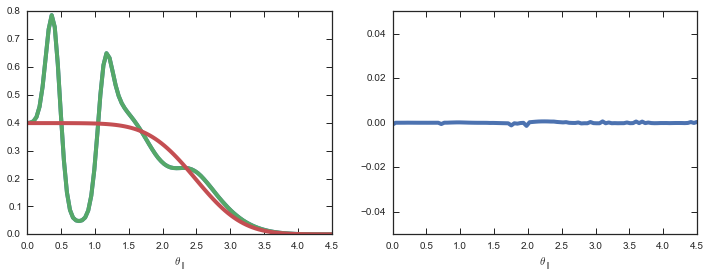

In [16]:
figsize(12,4)
subplot(1,2,1)
plot(xs,dens_2impacts/numpy.sum(dens_2impacts)/(xs[1]-xs[0]),lw=4.)
plot(xs,dens_approx_2impacts/numpy.sum(dens_approx_2impacts)/(xs[1]-xs[0]),lw=4.)
plot(xs,dens_unp/numpy.sum(dens_unp)/(xs[1]-xs[0]),lw=4.)
#dum= hist(apar,bins=101,normed=True,histtype='step',color='k',zorder=0,lw=5.)
xlabel(r'$\theta_\parallel$')
subplot(1,2,2)
plot(xs,(dens_2impacts/numpy.sum(dens_2impacts)/(xs[1]-xs[0])\
         -dens_approx_2impacts/numpy.sum(dens_approx_2impacts)/(xs[1]-xs[0]))\
     /(dens_2impacts/numpy.sum(dens_2impacts)/(xs[1]-xs[0])),
     lw=4.)
xlabel(r'$\theta_\parallel$')
ylim(-0.05,0.05)

In [17]:
timexs= xs
start= time.time()
dum= numpy.array([sdf_pepper_2impacts.density_par(x,approx=True) for x in timexs])
approxTime= time.time()-start
start= time.time()
dum= numpy.array([sdf_pepper_2impacts.density_par(x,approx=False) for x in timexs])
print "Speed-up with approximation: %f; time / angle: %f ms" % ((time.time()-start)/approxTime,approxTime/len(timexs)*1000.)

Speed-up with approximation: 22.896922; time / angle: 17.001405 ms


For 3 impacts:

In [18]:
xs= numpy.linspace(0.,4.5,101)
# Compute
dens_unp= numpy.array([super(galpy.df_src.streampepperdf.streampepperdf,sdf_pepper_3impacts)._density_par(x) for x in xs])
dens_approx_3impacts= numpy.array([sdf_pepper_3impacts.density_par(x,approx=True) for x in xs])
dens_3impacts= numpy.array([sdf_pepper_3impacts.density_par(x,approx=False) for x in xs])

(-0.05, 0.05)

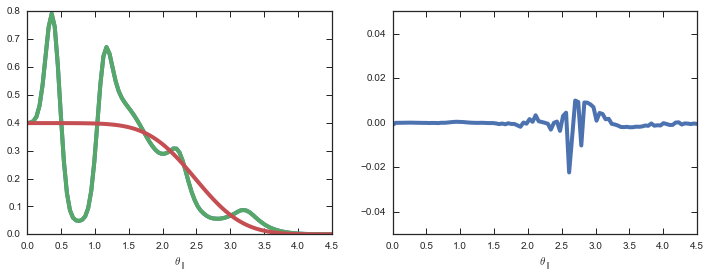

In [19]:
figsize(12,4)
subplot(1,2,1)
plot(xs,dens_3impacts/numpy.sum(dens_3impacts)/(xs[1]-xs[0]),lw=4.)
plot(xs,dens_approx_3impacts/numpy.sum(dens_approx_3impacts)/(xs[1]-xs[0]),lw=4.)
plot(xs,dens_unp/numpy.sum(dens_unp)/(xs[1]-xs[0]),lw=4.)
#dum= hist(apar,bins=101,normed=True,histtype='step',color='k',zorder=0,lw=5.)
xlabel(r'$\theta_\parallel$')
subplot(1,2,2)
plot(xs,(dens_3impacts/numpy.sum(dens_3impacts)/(xs[1]-xs[0])\
         -dens_approx_3impacts/numpy.sum(dens_approx_3impacts)/(xs[1]-xs[0]))\
     /(dens_3impacts/numpy.sum(dens_3impacts)/(xs[1]-xs[0])),
     lw=4.)
xlabel(r'$\theta_\parallel$')
ylim(-0.05,0.05)

In [20]:
timexs= xs
start= time.time()
dum= numpy.array([sdf_pepper_3impacts.density_par(x,approx=True) for x in timexs])
approxTime= time.time()-start
start= time.time()
dum= numpy.array([sdf_pepper_3impacts.density_par(x,approx=False) for x in timexs])
print "Speed-up with approximation: %f; time / angle: %f ms" % ((time.time()-start)/approxTime,approxTime/len(timexs)*1000.)

Speed-up with approximation: 9.098921; time / angle: 68.509744 ms


For 4 impacts:

In [21]:
xs= numpy.linspace(0.,4.5,101)
# Compute
dens_unp= numpy.array([super(galpy.df_src.streampepperdf.streampepperdf,sdf_pepper_4impacts)._density_par(x) for x in xs])
dens_approx_4impacts= numpy.array([sdf_pepper_4impacts.density_par(x,approx=True) for x in xs])
dens_4impacts= numpy.array([sdf_pepper_4impacts.density_par(x,approx=False) for x in xs])

(-0.05, 0.05)

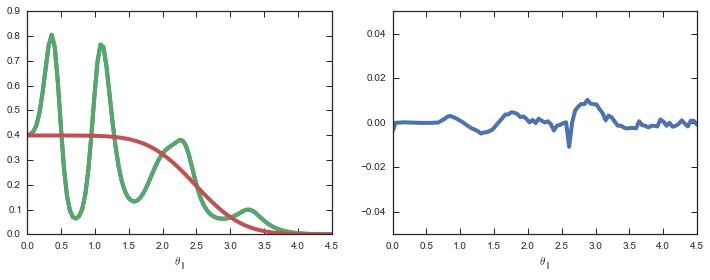

In [22]:
figsize(12,4)
subplot(1,2,1)
plot(xs,dens_4impacts/numpy.sum(dens_4impacts)/(xs[1]-xs[0]),lw=4.)
plot(xs,dens_approx_4impacts/numpy.sum(dens_approx_4impacts)/(xs[1]-xs[0]),lw=4.)
plot(xs,dens_unp/numpy.sum(dens_unp)/(xs[1]-xs[0]),lw=4.)
#dum= hist(apar,bins=101,normed=True,histtype='step',color='k',zorder=0,lw=5.)
xlabel(r'$\theta_\parallel$')
subplot(1,2,2)
plot(xs,(dens_4impacts/numpy.sum(dens_4impacts)/(xs[1]-xs[0])\
         -dens_approx_4impacts/numpy.sum(dens_approx_4impacts)/(xs[1]-xs[0]))\
     /(dens_4impacts/numpy.sum(dens_4impacts)/(xs[1]-xs[0])),
     lw=4.)
xlabel(r'$\theta_\parallel$')
ylim(-0.05,0.05)

In [23]:
timexs= xs
start= time.time()
dum= numpy.array([sdf_pepper_4impacts.density_par(x,approx=True) for x in timexs])
approxTime= time.time()-start
start= time.time()
dum= numpy.array([sdf_pepper_4impacts.density_par(x,approx=False) for x in timexs])
print "Speed-up with approximation: %f; time / angle: %f ms" % ((time.time()-start)/approxTime,approxTime/len(timexs)*1000.)

Speed-up with approximation: 5.247593; time / angle: 155.472217 ms


## Tests of the mean $\Omega_\parallel$

For 1 impact:

In [24]:
xs= numpy.linspace(0.,4.5,101)
# Compute
mO_unp= numpy.array([super(galpy.df_src.streampepperdf.streampepperdf,sdf_pepper_1impacts).meanOmega(x,oned=True) for x in xs])
mO_approx_1impacts= numpy.array([sdf_pepper_1impacts.meanOmega(x,oned=True,approx=True) for x in xs])
mO_1impacts= numpy.array([sdf_pepper_1impacts.meanOmega(x,oned=True,approx=False) for x in xs])

(-0.01, 0.01)

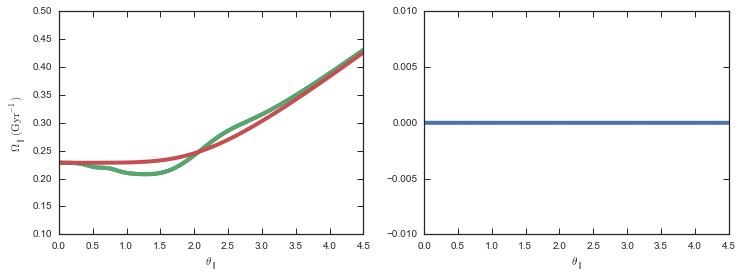

In [25]:
figsize(12,4)
subplot(1,2,1)
plot(xs,mO_1impacts*bovy_conversion.freq_in_Gyr(V0,R0),lw=4.)
plot(xs,mO_approx_1impacts*bovy_conversion.freq_in_Gyr(V0,R0),lw=4.)
plot(xs,mO_unp*bovy_conversion.freq_in_Gyr(V0,R0),lw=4.)
ylim(0.1,0.5)
xlabel(r'$\theta_\parallel$')
ylabel(r'$\Omega_\parallel\,(\mathrm{Gyr}^{-1})$')
subplot(1,2,2)
plot(xs,(mO_1impacts-mO_approx_1impacts)/mO_1impacts,lw=4.)
xlabel(r'$\theta_\parallel$')
ylim(-0.01,0.01)

In [26]:
timexs= xs[::10]
start= time.time()
dum= numpy.array([sdf_pepper_1impacts.meanOmega(x,oned=True,approx=True) for x in timexs])
approxTime= time.time()-start
start= time.time()
dum= numpy.array([sdf_pepper_1impacts.meanOmega(x,oned=True,approx=False) for x in timexs])
print "Speed-up with approximation: %f; time / angle: %f ms" % ((time.time()-start)/approxTime,approxTime/len(timexs)*1000.)

Speed-up with approximation: 338.042513; time / angle: 1.321467 ms


For 2 impacts:

In [27]:
xs= numpy.linspace(0.,4.5,101)
# Compute
mO_unp= numpy.array([super(galpy.df_src.streampepperdf.streampepperdf,sdf_pepper_2impacts).meanOmega(x,oned=True) for x in xs])
mO_approx_2impacts= numpy.array([sdf_pepper_2impacts.meanOmega(x,oned=True,approx=True) for x in xs])
mO_2impacts= numpy.array([sdf_pepper_2impacts.meanOmega(x,oned=True,approx=False) for x in xs])

(-0.01, 0.01)

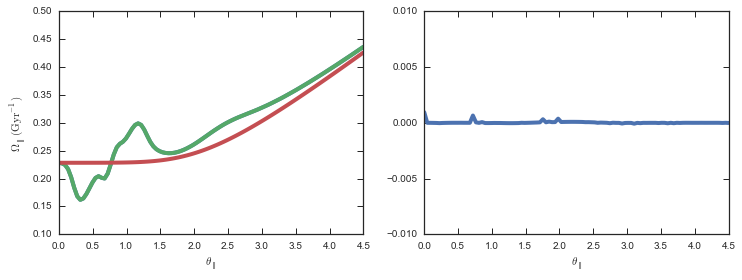

In [28]:
figsize(12,4)
subplot(1,2,1)
plot(xs,mO_2impacts*bovy_conversion.freq_in_Gyr(V0,R0),lw=4.)
plot(xs,mO_approx_2impacts*bovy_conversion.freq_in_Gyr(V0,R0),lw=4.)
plot(xs,mO_unp*bovy_conversion.freq_in_Gyr(V0,R0),lw=4.)
ylim(0.1,0.5)
xlabel(r'$\theta_\parallel$')
ylabel(r'$\Omega_\parallel\,(\mathrm{Gyr}^{-1})$')
subplot(1,2,2)
plot(xs,(mO_2impacts-mO_approx_2impacts)/mO_2impacts,lw=4.)
xlabel(r'$\theta_\parallel$')
ylim(-0.01,0.01)

In [29]:
timexs= xs[::10]
start= time.time()
dum= numpy.array([sdf_pepper_2impacts.meanOmega(x,oned=True,approx=True) for x in timexs])
approxTime= time.time()-start
start= time.time()
dum= numpy.array([sdf_pepper_2impacts.meanOmega(x,oned=True,approx=False) for x in timexs])
print "Speed-up with approximation: %f; time / angle: %f ms" % ((time.time()-start)/approxTime,approxTime/len(timexs)*1000.)

Speed-up with approximation: 40.373998; time / angle: 19.593087 ms


For 3 impacts:

In [30]:
xs= numpy.linspace(0.,4.5,101)
# Compute
mO_unp= numpy.array([super(galpy.df_src.streampepperdf.streampepperdf,sdf_pepper_2impacts).meanOmega(x,oned=True) for x in xs])
mO_approx_3impacts= numpy.array([sdf_pepper_3impacts.meanOmega(x,oned=True,approx=True) for x in xs])
mO_3impacts= numpy.array([sdf_pepper_3impacts.meanOmega(x,oned=True,approx=False) for x in xs])

(-0.01, 0.01)

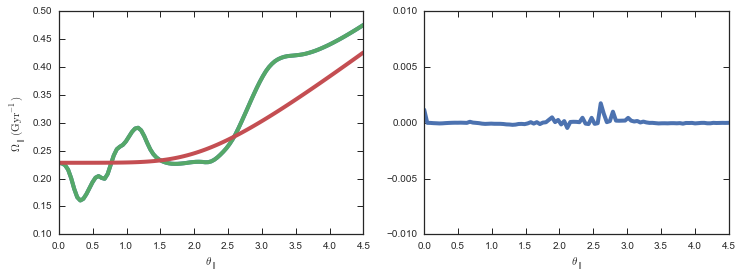

In [31]:
figsize(12,4)
subplot(1,2,1)
plot(xs,mO_3impacts*bovy_conversion.freq_in_Gyr(V0,R0),lw=4.)
plot(xs,mO_approx_3impacts*bovy_conversion.freq_in_Gyr(V0,R0),lw=4.)
plot(xs,mO_unp*bovy_conversion.freq_in_Gyr(V0,R0),lw=4.)
ylim(0.1,0.5)
xlabel(r'$\theta_\parallel$')
ylabel(r'$\Omega_\parallel\,(\mathrm{Gyr}^{-1})$')
subplot(1,2,2)
plot(xs,(mO_3impacts-mO_approx_3impacts)/mO_1impacts,lw=4.)
xlabel(r'$\theta_\parallel$')
ylim(-0.01,0.01)

In [32]:
timexs= xs[::10]
start= time.time()
dum= numpy.array([sdf_pepper_3impacts.meanOmega(x,oned=True,approx=True) for x in timexs])
approxTime= time.time()-start
start= time.time()
dum= numpy.array([sdf_pepper_3impacts.meanOmega(x,oned=True,approx=False) for x in timexs])
print "Speed-up with approximation: %f; time / angle: %f ms" % ((time.time()-start)/approxTime,approxTime/len(timexs)*1000.)

Speed-up with approximation: 16.627359; time / angle: 71.430726 ms


For 4 impacts:

In [33]:
xs= numpy.linspace(0.,4.5,101)
# Compute
mO_unp= numpy.array([super(galpy.df_src.streampepperdf.streampepperdf,sdf_pepper_4impacts).meanOmega(x,oned=True) for x in xs])
mO_approx_4impacts= numpy.array([sdf_pepper_4impacts.meanOmega(x,oned=True,approx=True) for x in xs])
mO_4impacts= numpy.array([sdf_pepper_4impacts.meanOmega(x,oned=True,approx=False) for x in xs])

(-0.01, 0.01)

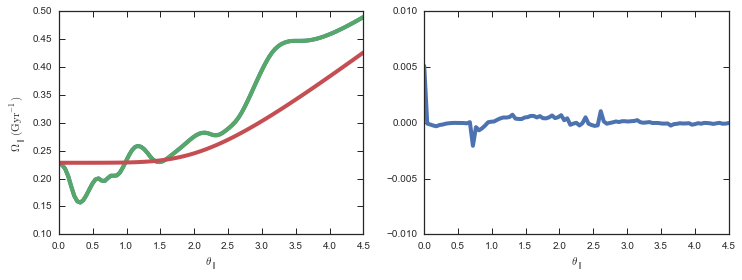

In [34]:
figsize(12,4)
subplot(1,2,1)
plot(xs,mO_4impacts*bovy_conversion.freq_in_Gyr(V0,R0),lw=4.)
plot(xs,mO_approx_4impacts*bovy_conversion.freq_in_Gyr(V0,R0),lw=4.)
plot(xs,mO_unp*bovy_conversion.freq_in_Gyr(V0,R0),lw=4.)
ylim(0.1,0.5)
xlabel(r'$\theta_\parallel$')
ylabel(r'$\Omega_\parallel\,(\mathrm{Gyr}^{-1})$')
subplot(1,2,2)
plot(xs,(mO_4impacts-mO_approx_4impacts)/mO_4impacts,lw=4.)
xlabel(r'$\theta_\parallel$')
ylim(-0.01,0.01)

In [35]:
timexs= xs[::10]
start= time.time()
dum= numpy.array([sdf_pepper_4impacts.meanOmega(x,oned=True,approx=True) for x in timexs])
approxTime= time.time()-start
start= time.time()
dum= numpy.array([sdf_pepper_4impacts.meanOmega(x,oned=True,approx=False) for x in timexs])
print "Speed-up with approximation: %f; time / angle: %f ms" % ((time.time()-start)/approxTime,approxTime/len(timexs)*1000.)

Speed-up with approximation: 9.337886; time / angle: 150.004365 ms
